Training LeNet-5 with MNIST dataset

## Data preparation 

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras import backend as K

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [43]:
# input image dimensions
img_rows, img_cols = 28, 28
num_classes = 10

In [42]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [44]:
# normalize data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


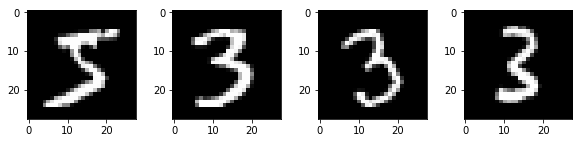

In [23]:
# sample view
index = [0, 10000, 30000, 50000]
plt.figure(figsize=(10,2))
for i in range(1,5):
    plt.subplot(1,4,i)
    plt.imshow(x_train[index[i-1]].reshape((28,28)), cmap='gray')
plt.show()

## Model definition
![](https://www.researchgate.net/publication/328747541/figure/fig1/AS:689664499392513@1541440238195/The-network-structure-of-LeNet5-25.png)
**LeNet-5 layers**:
1. Convolution #1. Input = 32x32x1. Output = 28x28x6 conv2d
2.    SubSampling #1. Input = 28x28x6. Output = 14x14x6. SubSampling is simply Average Pooling so we use avg_pool
3.    Convolution #2. Input = 14x14x6. Output = 10x10x16 conv2d
4.    SubSampling #2. Input = 10x10x16. Output = 5x5x16 avg_pool
5.    Fully Connected #1. Input = 5x5x16. Output = 120
6.    Fully Connected #2. Input = 120. Output = 84
7.    Output 10

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, AveragePooling2D

In [50]:
lenet = Sequential()

lenet.add(
    Conv2D(
        filters=6, 
        kernel_size=(3,3), 
        activation='sigmoid', 
        input_shape=(28,28,1),
        name='CONV1'
    )
)

lenet.add(AveragePooling2D(name='POOL1'))

lenet.add(
    Conv2D(
        filters=16,
        kernel_size=(3,3),
        activation='sigmoid',
        name='CONV2'
    )
)

lenet.add(AveragePooling2D(name='POOL2'))

lenet.add(Flatten(name='FLATTEN1'))
lenet.add(Dense(units=120, activation='sigmoid', name='FC1'))
lenet.add(Dense(units=84, activation='sigmoid', name='FC2'))
lenet.add(Dense(units=10, activation='softmax', name='OUTPUT'))

In [51]:
lenet.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
CONV1 (Conv2D)               (None, 26, 26, 6)         60        
_________________________________________________________________
POOL1 (AveragePooling2D)     (None, 13, 13, 6)         0         
_________________________________________________________________
CONV2 (Conv2D)               (None, 11, 11, 16)        880       
_________________________________________________________________
POOL2 (AveragePooling2D)     (None, 5, 5, 16)          0         
_________________________________________________________________
FLATTEN1 (Flatten)           (None, 400)               0         
_________________________________________________________________
FC1 (Dense)                  (None, 120)               48120     
_________________________________________________________________
FC2 (Dense)                  (None, 84)                10164     
__________

In [52]:
lenet.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)

In [53]:
EPOCHS = 50
BATCH_SIZE = 128
his = lenet.fit(x_train, y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                verbose=1,
                validation_data=(x_test, y_test)
               )

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 1.5578 - acc: 0.4824 - val_loss: 0.5457 - val_acc: 0.8492
Epoch 2/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.4155 - acc: 0.8806 - val_loss: 0.3314 - val_acc: 0.9007
Epoch 3/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.3011 - acc: 0.9094 - val_loss: 0.2605 - val_acc: 0.9229
Epoch 4/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2458 - acc: 0.9249 - val_loss: 0.2173 - val_acc: 0.9339
Epoch 5/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2069 - acc: 0.9362 - val_loss: 0.1852 - val_acc: 0.9436
Epoch 6/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1803 - acc: 0.9451 - val_loss: 0.1629 - val_acc: 0.9503
Epoch 7/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.1583 - acc: 0.9513 - val_loss: 0.1434 - val_acc

In [56]:
his.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

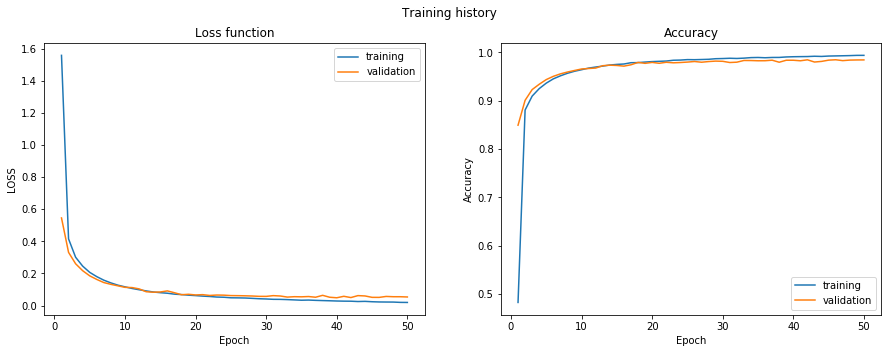

In [62]:
epoch = list(range(1, EPOCHS+1))
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(epoch, his.history['loss'], label='training')
plt.plot(epoch, his.history['val_loss'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('LOSS')
plt.title('Loss function')
plt.legend()

plt.subplot(1,2,2)
plt.plot(epoch, his.history['acc'], label='training')
plt.plot(epoch, his.history['val_acc'], label='validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()

plt.suptitle('Training history')
plt.show()



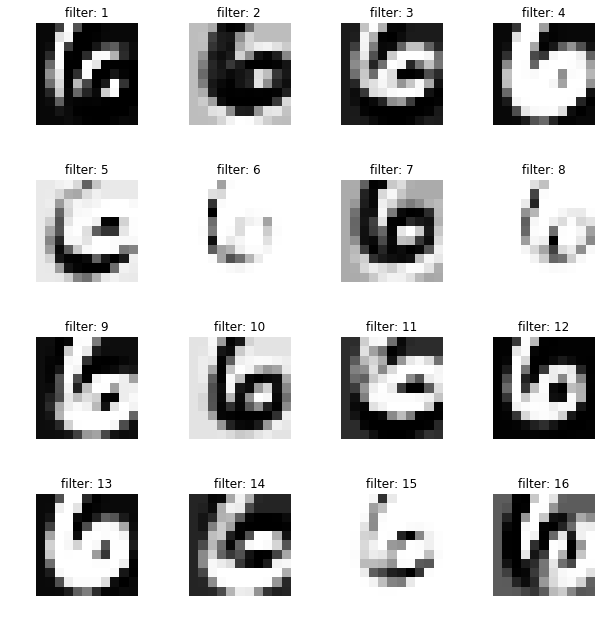

In [73]:
# Visualize 16 filters of CONV2:
from keras.models import Model
import numpy as np
intermediate_layer_model = \
    Model(inputs=lenet.input, outputs=lenet.get_layer("CONV2").output)
intermediate_output = intermediate_layer_model.predict(np.expand_dims(x_test[100],axis=0))
plt.figure(figsize=(10,10),)
for i in range(intermediate_output.shape[-1]):
    plt.subplot(4,4,i+1) 
    plt.subplots_adjust(left  = 0.125 ,right = 0.9 , bottom = 0.1,top = 0.9  ,wspace = 0.5 ,hspace = 0.5 )
    plt.axis("off")
    plt.title("filter: %i" %(i+1))
    im = intermediate_output[:,:,:,i]
    plt.imshow(np.squeeze(im), cmap=plt.get_cmap('gray'))